# Jiu Yang (James) Wang

## Research question/interests

**My part of the project will be analyzing the correlation between housing prices and inventory shortfall as compared to population increases.**

My research question is looking at the correlation between housing prices and shortfall. Housing affordability is a pivotal issue for my generation, and i believe that the oft touted narrative of phantom overseas buyers is only a narrative meant to distract from the fact that the true cause of housing prices is a lack of new housing as compared to population. 

I plan to tackle my question by plotting housing price and invetory shortfall. I plan to calculate inventory shortfall by calculating the difference between population increases in regions and the amount of housing built. I will then present this to the reader by visualizing this data in graphs. I may also include the comparison to interest rates, and compare it to the shortfall plot. 

In [150]:

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import dates as dates
import numpy as np


DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRate.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory.csv", low_memory = False)
#PopEstimate = pd.read_csv("../data/processed/PE_Wrangled_Final")
PopEstimate = pd.read_csv("../data/raw/PopEstimate.csv")
LPE = pd.read_csv("../data/processed/PE_ordered_filtered.csv")


In [ ]:
#DailyInterestRate.sample(30)
#NewHousingPIndex.sample(10)
#NewInventory.sample(10)
#PopEstimate.sample(10)

In [10]:
#Pruning for interest rate table

#Prunes out data from before 2001-01-01
#Also selects only the target target rate
DailyInterestRatePruned = DailyInterestRate[(DailyInterestRate["Financial market statistics"] == "Target rate") & (DailyInterestRate["REF_DATE"] > "2001-01-01")] 
DailyInterestRatePruned2 = DailyInterestRatePruned[['REF_DATE', 'VALUE']]
DailyInterestRatePruned3 = DailyInterestRatePruned2.dropna()
#DailyInterestRatePruned3.sample(30)
DailyInterestRatePruned3.to_csv("../data/processed/DailyInterestRatePruned.csv")


In [117]:
#Processes PIndex into separate CSVs for each region

#Creates list of locales

locales = LPE.GEO.unique()

#Creates a csv for each locale
for city in locales:
    name = city[:(city.find(",")+1) ]
    working = NewHousingPIndex[(NewHousingPIndex["GEO"] == city) & (NewHousingPIndex["New housing price indexes"] == "Total (house and land)") & (NewHousingPIndex["REF_DATE"] > "2001-01-01")]
    working2 = working[['REF_DATE', 'VALUE']]
    #working2.sample(10)
    name = "../data/processed/PIndex/" + name + "PIndex.csv"
    #print(name)
    working2.to_csv(name)
    
    





In [95]:
#Processes New Inventory into separate CSVs for each region

#Creates list of locales

locales = LPE.GEO.unique()

#Creates a csv for each locale
for city in locales:
    name = city[:(city.find(",")+1) ]
    working = NewInventory[(NewInventory["GEO"] == city) & (NewInventory["Housing estimates"] == "Housing completions") & (NewInventory["Type of unit"] == "Total units") & (NewInventory["REF_DATE"] > "2001-01-01")]
    working2 = working[['REF_DATE', 'VALUE']]
    #working2.sample(10)
    name = "../data/processed/NewInventory/" + name + "NewInventory.csv"
    #print(name)
    working2.to_csv(name)
    
locales

array(['Toronto, Ontario', 'Montréal, Quebec',
       'Vancouver, British Columbia', 'Ottawa-Gatineau, Ontario/Quebec',
       'Calgary, Alberta', 'Edmonton, Alberta', 'Québec, Quebec',
       'Winnipeg, Manitoba', 'Hamilton, Ontario',
       'Kitchener-Cambridge-Waterloo, Ontario', 'London, Ontario',
       'St. Catharines-Niagara, Ontario', 'Halifax, Nova Scotia',
       'Oshawa, Ontario', 'Victoria, British Columbia',
       'Windsor, Ontario', 'Saskatoon, Saskatchewan',
       'Regina, Saskatchewan', 'Sherbrooke, Quebec',
       "St. John's, Newfoundland and Labrador", 'Barrie, Ontario',
       'Kelowna, British Columbia',
       'Abbotsford-Mission, British Columbia', 'Greater Sudbury, Ontario',
       'Kingston, Ontario', 'Saguenay, Quebec', 'Trois-Rivières, Quebec',
       'Guelph, Ontario', 'Moncton, New Brunswick', 'Brantford, Ontario'],
      dtype=object)

In [152]:
#Processes popestimate into separate CSVs for each region

#Creates list of locales

#locales = PopEstimate.GEO.unique()
locales = LPE.GEO.unique()

#Creates a csv for each locale
for city in locales:
    name = city[:(city.find(",")+1) ]
    name2 = name[:-1]
    #working = PopEstimate[(PopEstimate["GEO"] == city) & (PopEstimate["Age group"] == "All ages") & (PopEstimate["Sex"] == "Both sexes")]
    working = PopEstimate[(PopEstimate["GEO"].str.contains(name2)) & (PopEstimate["Age group"] == "All ages") & (PopEstimate["Sex"] == "Both sexes")]
    working2 = working[['REF_DATE', 'VALUE', 'Age group']]
    #working2.sample(10)
    name = "../data/processed/PopEstimate/" + name + "PopEstimate.csv"
    #print(name)
    working2.to_csv(name)
    
    

    

In [3]:
#Graph on target interest rate as a function of time

df = pd.read_csv("../data/processed/DailyInterestRatePruned.csv")

ax = sns.lineplot(df, x = "REF_DATE" , y = 'VALUE')
ax.set(xlabel = "Date",
        ylabel = "Target Rate (%)",
        title = "Bank of Canada Daily Target Rate"
        )



NameError: name 'pd' is not defined

[Text(0.5, 0, 'Yearly Average'),
 Text(0, 0.5, 'Target Rate (%)'),
 Text(0.5, 1.0, 'Bank of Canada Monthly Target Rate')]

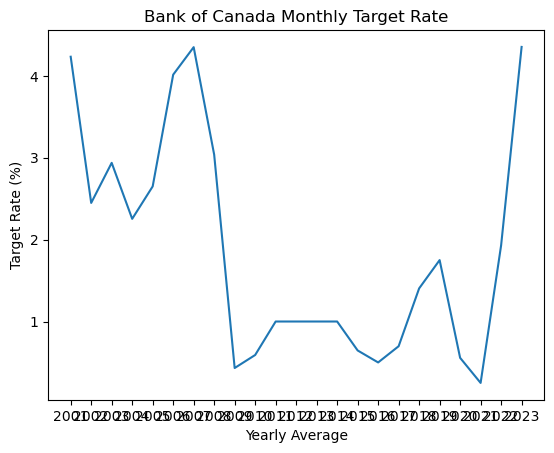

In [46]:
df2 = df.groupby(pd.PeriodIndex(df["REF_DATE"], freq="Y"))["VALUE"].mean().reset_index()

ax2 = sns.lineplot(df2, x = df2.REF_DATE.astype(str) , y = 'VALUE')

ax2.set(xlabel="Yearly Average",
        ylabel="Target Rate (%)",
        title="Bank of Canada Monthly Target Rate"
        )


In [109]:
#Makes a list of locales

locales = LPE.GEO.unique()
pd.DataFrame(locales).to_csv("../data/processed/locales.csv")


# EDA 1 ANALYSIS:
As can be seen in the above 2 graphs, due to the amount of data available, for display purposes, the yearly rates graph tracks close enough to the general shape of the daily interest rates. This means that while the actual analysis will be done with raw data, presentations can use monthly, or yearly data for simplicity. 

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Shortfall'),
 Text(0.5, 1.0, 'Housing shortfall in Abottsford mission assuming 1.5 persons per home')]

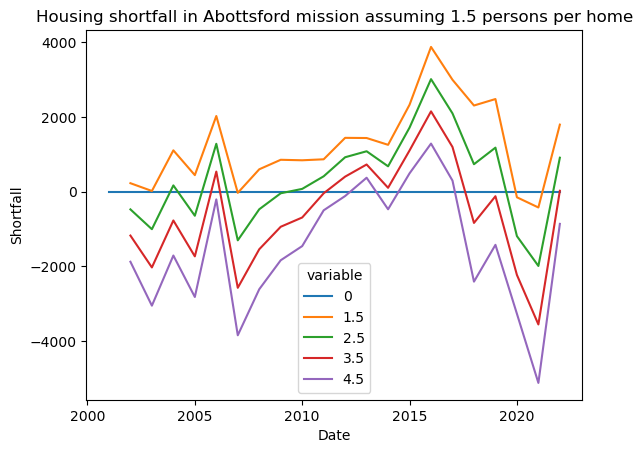

In [96]:
abpopest = pd.read_csv("../data/processed/PopEstimate/Abbotsford - Mission (CMA),PopEstimate.csv")
abnewinv = pd.read_csv("../data/processed/NewInventory/Abbotsford-Mission,NewInventory.csv")

abnewinvyr = abnewinv.groupby(pd.PeriodIndex(abnewinv["REF_DATE"], freq="Y"))["VALUE"].sum().reset_index()
abpopest["Change"] = abpopest["VALUE"].diff()

shortfall = pd.DataFrame()
shortfall["Date"] = abpopest["REF_DATE"]
shortfall["0"] = (abnewinvyr["VALUE"]  * 0)
shortfall["1.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 1.5))
shortfall["2.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 2.5))
shortfall["3.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 3.5))
shortfall["4.5"] =  (abpopest["Change"] - (abnewinvyr["VALUE"]  * 4.5))


shortfallgraph = sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(shortfall, ['Date']))
shortfallgraph.set(xlabel = "Date",
        ylabel = "Shortfall",
        title = "Housing shortfall in Abottsford mission assuming 1.5 persons per home"
        )



# EDA 2 ANALYSIS:

This is a test illustration for calculating shortfall for a region, this graph shows that the data is as expected, and that processing has gone right to wrangle it into what i want it to do. In this graph, we see that varying assumptions for how many people on average live in a home affect whether there is a shortfall or not, and that housing must support at least an average of 2.5 people to be able to maintain a relatively neutral inventory. 

In [85]:
calindex = pd.read_csv("../data/processed/PIndex/Calgary,PIndex.csv")
calpopest = pd.read_csv("../data/processed/PopEstimate/Calgary (CMA),PopEstimate.csv")
calnewinv = pd.read_csv("../data/processed/NewInventory/Calgary,NewInventory.csv")

calnewinvyr = calnewinv.groupby(pd.PeriodIndex(calnewinv["REF_DATE"], freq="Y"))["VALUE"].sum().reset_index()
calindex = calindex.groupby(pd.PeriodIndex(calnewinv["REF_DATE"], freq="Y"))["VALUE"].mean().reset_index()
calpopest["Change"] = calpopest["VALUE"].diff()
calindex["PDelta"] = calindex["VALUE"].diff()

shortfall = pd.DataFrame()
shortfall["PDelta"] = calindex["PDelta"] * 1000
shortfall["Date"] = calpopest["REF_DATE"]
shortfall["0"] = (calnewinvyr["VALUE"]  * 0)
shortfall["1.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 1.5))
shortfall["2.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 2.5))
shortfall["3.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 3.5))
shortfall["4.5"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 4.5))

shortfallgraph = sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(shortfall, ['Date']))
shortfallgraph.set(xlabel = "Date",
        ylabel = "Shortfall",
        title = "Housing shortfall in Abottsford mission assuming x persons per home"
        )

,PDelta,Date,0,1.5,2.5,3.5,4.5
0,NaN,2001,0,NaN,NaN,NaN,NaN
1,2241.666667,2002,0,10312.0,-2318.0,-14948.0,-27578.0
2,2408.333333,2003,0,124.5,-14162.5,-28449.5,-42736.5
3,2683.333333,2004,0,3578.0,-9436.0,-22450.0,-35464.0
4,3550.000000,2005,0,14857.0,2043.0,-10771.0,-23585.0
5,23875.000000,2006,0,19924.0,7234.0,-5456.0,-18146.0
6,12683.333333,2007,0,11169.0,-1943.0,-15055.0,-28167.0
7,591.666667,2008,0,10623.5,-3571.5,-17766.5,-31961.5
8,-6125.000000,2009,0,20867.0,12629.0,4391.0,-3847.0
9,1525.000000,2010,0,3334.5,-7656.5,-18647.5,-29638.5


# EDA 3 ANALYSIS:
this preliminary analysis seems to suggest that price indices jump following a shortfall. We see this in all shortfall except the one for 2008. My later analysis will focus on to what extent this pattern is reproduced in other regions, how significant it is, and also if its more relevant than other possible factors. 

# PM4 Test Code:

This will be the test ground for my PM4 code, i will assume that each home provides on average housing for 2 people. 

ValueError: Grouper and axis must be same length

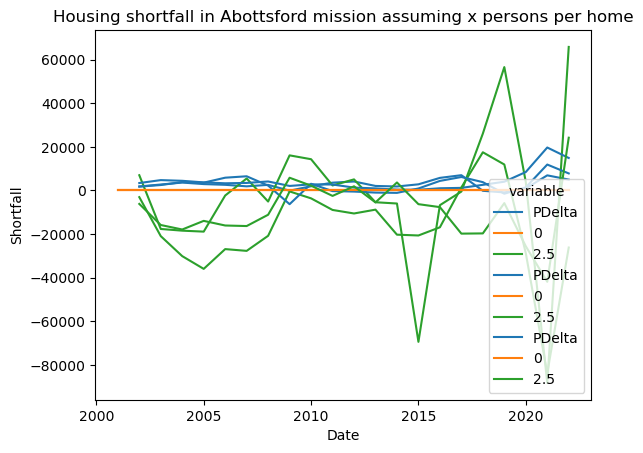

In [241]:

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import dates as dates
import numpy as np



def ProcessData():

        locales = LPE.GEO.unique()

        for city in locales:

                LPE = pd.read_csv("../data/processed/PE_ordered_filtered.csv")
                
                name = city[:(city.find(",")+1) ]
        
                cityname = "../data/processed/PIndex/"+ str(name) +"PIndex.csv"
                citindex = pd.read_csv(cityname)
        
                cityname = "../data/processed/PopEstimate/"+ str(name) +"PopEstimate.csv"
                citpopest = pd.read_csv(cityname)
        
                cityname = "../data/processed/NewInventory/"+ str(name) +"NewInventory.csv"
                citnewinv = pd.read_csv(cityname)

                citnewinvyr = citnewinv.groupby(pd.PeriodIndex(citnewinv["REF_DATE"], freq="Y"))["VALUE"].sum().reset_index()
                citindex = citindex.groupby(pd.PeriodIndex(citindex["REF_DATE"], freq="Y"))["VALUE"].mean().reset_index()
                citpopest["Change"] = citpopest["VALUE"].diff()
                calindex["PDelta"] = calindex["VALUE"].diff()

                shortfall = pd.DataFrame()
                shortfall["PDelta"] = calindex["PDelta"] * 1000
                shortfall["Date"] = calpopest["REF_DATE"]
                shortfall["0"] = (calnewinvyr["VALUE"]  * 0)
                shortfall["2"] =  (calpopest["Change"] - (calnewinvyr["VALUE"]  * 2))

                shortfallgraph = sns.lineplot(x='Date', y='value', hue='variable', 
                        data=pd.melt(shortfall, ['Date']))

                shortfallgraph.set(xlabel = "Date",
                        ylabel = "Shortfall",
                        title = F"Housing shortfall in {city} assuming 2 persons per home"
                        )

                plt.legend(title = "Legend", labels = ["Price Changes\n(exaggerated)","","Zero Line","","Shortfall"])
        
                fig = shortfallgraph.get_figure()
                fig.savefig("out.png")






        